In [26]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
#DataFlair - Read the data
df=pd.read_csv('/content/parkinsons (3).data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

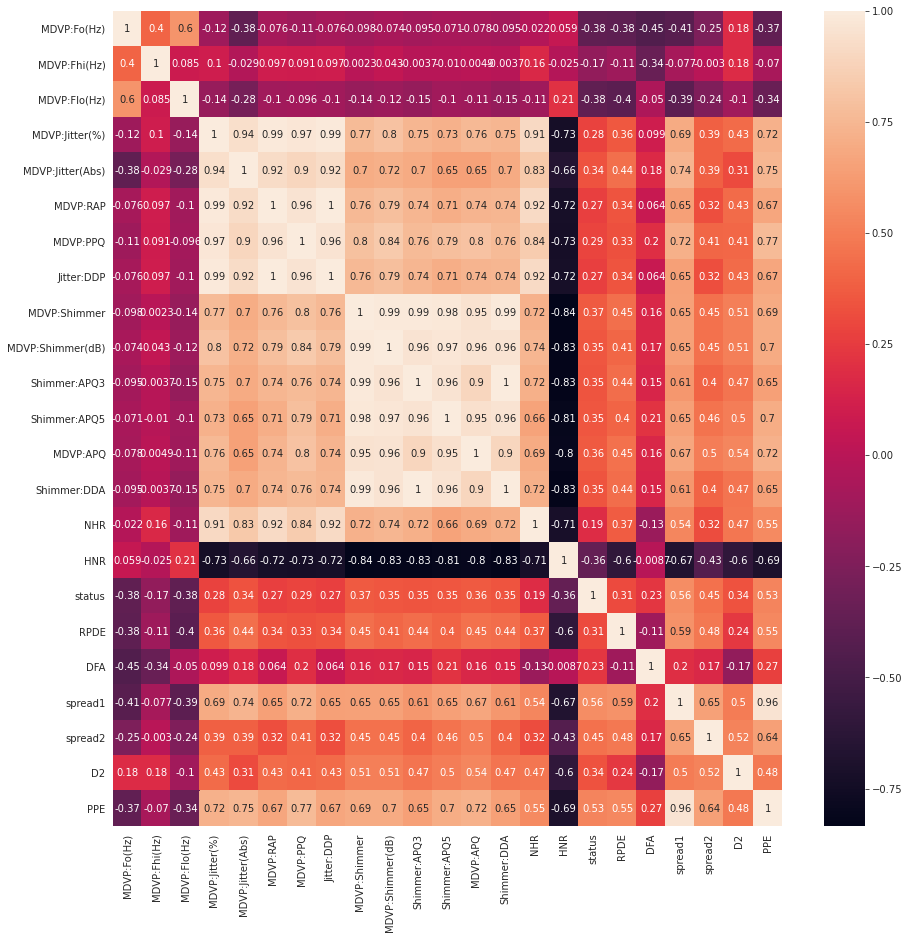

In [6]:
corr_map=df.corr()
sns.set_style('darkgrid') 
# sns.set_style help to set color of the axes, whether a grid is enabled by default, and other aesthetic elements.
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_map, annot=True)

In [7]:
features=df.loc[:,df.columns!='status']
labels=df.loc[:,'status']

In [8]:
print("Examples with label '0': {}\n Examples with label '1': {}".format(labels[labels==0].shape, labels[labels==1].shape))

Examples with label '0': (48,)
 Examples with label '1': (147,)


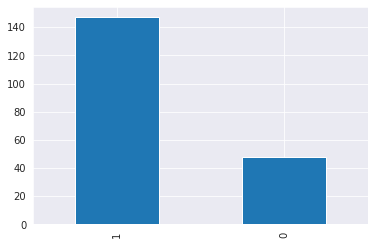

In [24]:
df["status"].value_counts().plot.bar();

In [9]:
mm_scaler = MinMaxScaler(feature_range=(-1,1))

In [10]:
x = mm_scaler.fit_transform(features.drop('name', axis=1)) 
y = labels.values

In [11]:
df.shape

(195, 24)

In [12]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

##KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 1)
classifier1.fit(x_train, y_train)

y_pred = classifier1.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)
accuracy_knn = accuracy_score(y_test, y_pred)

print("Accuracy of tested model is " , accuracy_knn)

[[ 4 12]
 [ 0 43]]
Accuracy of tested model is  0.7966101694915254


## SVM

In [14]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(x_train, y_train)

y_pred_svc = classifier_svc.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Accuracy of tested SVM model is " , accuracy_svc)

[[10  6]
 [ 0 43]]
Accuracy of tested SVM model is  0.8983050847457628


## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

# create DecisionTreeClassifier object
dt_model = DecisionTreeClassifier(random_state=42, max_depth=50)

dt_model.fit(x_train, y_train.ravel())

prediction_from_trained_data = dt_model.predict(x_train)

from sklearn import metrics


dt_predict_test = dt_model.predict(x_test)

#get accuracy
dt_accuracy_testdata = metrics.accuracy_score(y_test, dt_predict_test)

#print accuracy
print ("Accuracy of tested DT model is: {0:.4f}".format(dt_accuracy_testdata))

from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

Accuracy of tested DT model is: 0.8983
[[ 4 12]
 [ 0 43]]


## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  

# set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(x_train, y_train.ravel())

lr_cv_predict_test = lr_cv_model.predict(x_test)

# testing metrics
print( "Accuracy of tested logisticRegressionCV: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

Accuracy of tested logisticRegressionCV: 0.8644
[[ 4 12]
 [ 0 43]]


In [17]:
from xgboost import XGBClassifier
#Train the model
model=XGBClassifier()
model.fit(x_train,y_train)
yhat = model.predict(x_test)
#Calculate the accuracy
accuracy = accuracy_score(y_test, yhat)


print("Accuracy" , accuracy)

Accuracy 0.9491525423728814


In [18]:
!pip3 install catboost

     |████████████████████████████████| 67.3MB 57kB/s 


##CatBoost

In [19]:
from catboost import CatBoostClassifier
clf=CatBoostClassifier()
clf.fit(x_train,y_train)
yhat = clf.predict(x_test)


Learning rate set to 0.004395
0:	learn: 0.6891270	total: 52.4ms	remaining: 52.3s
1:	learn: 0.6849695	total: 56.3ms	remaining: 28.1s
2:	learn: 0.6799669	total: 60.1ms	remaining: 20s
3:	learn: 0.6755607	total: 63.7ms	remaining: 15.9s
4:	learn: 0.6721107	total: 67.5ms	remaining: 13.4s
5:	learn: 0.6685804	total: 71.1ms	remaining: 11.8s
6:	learn: 0.6643287	total: 74.9ms	remaining: 10.6s
7:	learn: 0.6601129	total: 78.8ms	remaining: 9.77s
8:	learn: 0.6565758	total: 82.7ms	remaining: 9.1s
9:	learn: 0.6525210	total: 86.4ms	remaining: 8.55s
10:	learn: 0.6480069	total: 89.9ms	remaining: 8.08s
11:	learn: 0.6445612	total: 93.6ms	remaining: 7.7s
12:	learn: 0.6409056	total: 97.1ms	remaining: 7.37s
13:	learn: 0.6371437	total: 101ms	remaining: 7.1s
14:	learn: 0.6334637	total: 104ms	remaining: 6.85s
15:	learn: 0.6284805	total: 108ms	remaining: 6.64s
16:	learn: 0.6243897	total: 112ms	remaining: 6.45s
17:	learn: 0.6214835	total: 117ms	remaining: 6.38s
18:	learn: 0.6175830	total: 121ms	remaining: 6.23s
19:

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, yhat)
print(cm)
accuracy = accuracy_score(y_test, yhat)

print("Accuracy" , accuracy)

[[15  1]
 [ 1 42]]
Accuracy 0.9661016949152542


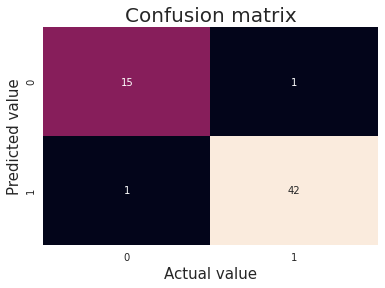

In [25]:
fig, ax = plt.subplots()
ax = sns.heatmap(cm, annot= True, fmt='d', cbar=False,
                 xticklabels=[0, 1],
                 yticklabels=[0, 1]);

plt.xlabel("Actual value",
          fontsize=15)
plt.ylabel("Predicted value",
          fontsize = 15);
plt.title("Confusion matrix",
         fontsize=20);

In [27]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.98      0.98      0.98        43

    accuracy                           0.97        59
   macro avg       0.96      0.96      0.96        59
weighted avg       0.97      0.97      0.97        59

